In [1]:
# Data processing imports
import pandas as pd
from urllib.parse import urlparse
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# ML modeling imports
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\njeri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\njeri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\njeri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_1 = pd.read_csv('data/Datafiniti_Hotel_Reviews.csv')
df_1.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10000, 25)

In [3]:
df_2 = pd.read_csv('data/Datafiniti_Hotel_Reviews_Jun19.csv')
df_2.columns

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')

In [4]:
# Make sure columns match before concatenating
df_2 = df_2.drop(columns='reviews.dateAdded')
df_2.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10000, 25)

In [5]:
data = pd.concat([df_1, df_2], ignore_index=True)
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20000, 25)

In [6]:
data.head(3)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com


In [7]:
data.columns

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites'],
      dtype='object')

## Look for missing values

In [8]:
data.isnull().sum()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              2
reviews.userCity        5836
reviews.userProvince    7297
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64

In [9]:
# ~30% or more of data missing
data = data.drop(columns=['reviews.userCity', 'reviews.userProvince'])
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20000, 23)

In [10]:
data.isnull().sum()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
reviews.date          0
reviews.dateSeen      0
reviews.rating        0
reviews.sourceURLs    0
reviews.text          1
reviews.title         2
reviews.username      0
sourceURLs            0
websites              0
dtype: int64

In [11]:
# NLP of reviews therefore drop missing reviews
data = data.dropna()
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19997, 23)

## Handle time data

- dateAdded is date info was added to Datafiniti - not needed for this exercise
- remove dateUpdated column
- remove dateAdded column
- remove reviews.dateSeen - not needed for this exercise
- convert review.date to date/time dtype:
    - parse month and year to separate columns
    - create season column

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19997 non-null  object 
 1   dateAdded           19997 non-null  object 
 2   dateUpdated         19997 non-null  object 
 3   address             19997 non-null  object 
 4   categories          19997 non-null  object 
 5   primaryCategories   19997 non-null  object 
 6   city                19997 non-null  object 
 7   country             19997 non-null  object 
 8   keys                19997 non-null  object 
 9   latitude            19997 non-null  float64
 10  longitude           19997 non-null  float64
 11  name                19997 non-null  object 
 12  postalCode          19997 non-null  object 
 13  province            19997 non-null  object 
 14  reviews.date        19997 non-null  object 
 15  reviews.dateSeen    19997 non-null  object 
 16  revi

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
data = data.drop(columns=['dateAdded', 'dateUpdated', 'reviews.dateSeen'])
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19997, 20)

In [14]:
data['reviews.date'] = pd.to_datetime(data['reviews.date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  19997 non-null  object             
 1   address             19997 non-null  object             
 2   categories          19997 non-null  object             
 3   primaryCategories   19997 non-null  object             
 4   city                19997 non-null  object             
 5   country             19997 non-null  object             
 6   keys                19997 non-null  object             
 7   latitude            19997 non-null  float64            
 8   longitude           19997 non-null  float64            
 9   name                19997 non-null  object             
 10  postalCode          19997 non-null  object             
 11  province            19997 non-null  object             
 12  reviews.date        19997 non-nu

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data['month'] = data['reviews.date'].dt.month
data['year'] = data['reviews.date'].dt.year
data.head()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,...,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,websites,month,year
0,AVwc252WIN2L1WUfpqLP,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,2013-11-14 00:00:00+00:00,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,11,2013
1,AVwc252WIN2L1WUfpqLP,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,2014-07-06 00:00:00+00:00,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,7,2014
2,AVwc252WIN2L1WUfpqLP,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,2015-01-02 00:00:00+00:00,5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,1,2015
3,AVwdOclqIN2L1WUfti38,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,...,2016-05-15 00:00:00+00:00,2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,5,2016
4,AVwdOclqIN2L1WUfti38,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,...,2016-07-09 00:00:00+00:00,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,7,2016


In [16]:
data = data.drop(columns='reviews.date')
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19997, 21)

In [17]:
def season(month):
    if month >= 1 and month <= 2:
        return 'winter'
    if month >= 3 and month <= 5:
        return 'spring'
    if month >= 6 and month <= 8:
        return 'summer'
    if month >= 9 and month <= 11:
        return 'fall'
    if month == 12:
        return 'winter'

data['visit_season'] = data['month'].map(season)
data.tail()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,websites,month,year,visit_season
19995,AVwdatg0ByjofQCxo5S5,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,...,4.0,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,12,2015,winter
19996,AVwdatg0ByjofQCxo5S5,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,...,5.0,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,11,2015,fall
19997,AVwdatg0ByjofQCxo5S5,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,...,5.0,https://www.tripadvisor.com/Hotel_Review-g5780...,This Hampton is located on a quiet street acro...,Great location,K261ANbrendah,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,7,2016,summer
19998,AV1thTgM3-Khe5l_OvT5,7886 Main Street,"Hotels,Bar,Hotel,Restaurants",Accommodation & Food Services,Hunter,US,us/ny/hunter/7886mainstreet/-435384771,42.210915,-74.215309,Roseberry's Inn,...,5.0,https://www.tripadvisor.com/Hotel_Review-g4793...,Awesome wings (my favorite was garlic parmesan...,Great Atmosphere!,soccerrocks2016,https://www.bbb.org/us/ny/hunter/profile/hotel...,http://www.roseberrysinnhunter.com/,10,2016,fall
19999,AV1tg9C7a4HuVbed8XA5,3505 S Main St,"Hotels,Hotels and motels,Corporate Lodging,Lod...",Accommodation & Food Services,Lindale,US,us/tx/lindale/3505smainst/-147603681,32.469540,-95.390420,Hampton Inn-lindale/tyler,...,4.0,http://tripadvisor.com/Hotel_Review-g56167-d22...,Clean facility just off freeway ..... staff fr...,Health care appointments,tootallsmith,https://www.yellowpages.com/lindale-tx/mip/ham...,http://hamptoninn3.hilton.com/en/hotels/texas/...,6,2017,summer


## Explore each column

In [18]:
data.id.nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2975

In [19]:
data.address.nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2970

In [20]:
data.categories.nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1652

In [21]:
data.primaryCategories.unique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Accommodation & Food Services',
       'Healthcare & Social Assistance,Accommodation & Food Services',
       'Accommodation & Food Services,Arts Entertainment & Recreation',
       'Arts Entertainment & Recreation',
       'Wholesale Trade,Accommodation & Food Services', 'Utilities',
       'Accommodation & Food Services,Administrative & Support & Waste Management & Remediation',
       'Accommodation & Food Services,Agriculture'], dtype=object)

In [22]:
data.city.nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1416

In [23]:
data.country.nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [24]:
# All reviews in US
data = data.drop(columns='country')
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19997, 21)

In [25]:
data['keys'].nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2976

In [26]:
data.name.nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2764

In [27]:
data.province.nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


50

In [28]:
data['reviews.rating'].unique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([5.  , 2.  , 4.  , 3.  , 1.  , 4.8 , 4.6 , 3.55, 4.4 , 4.15, 2.5 ,
       3.95, 2.9 , 3.35, 3.75, 4.5 , 2.1 , 1.65, 3.15, 2.7 , 1.45, 2.75,
       2.3 , 3.5 , 4.25, 1.25, 1.9 , 3.45, 3.25, 4.75])

In [29]:
# Change reviews to categories rather than numbers
def review_map(rating):
    if rating == 5:
        return 'great'
    if rating >=4 and rating < 5:
        return 'good'
    if rating < 4:
        return 'not great'

data['cat_rating'] = data['reviews.rating'].map(review_map)
data['cat_rating'].tail()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19995     good
19996    great
19997    great
19998    great
19999     good
Name: cat_rating, dtype: object

In [30]:
data['reviews.sourceURLs'].nunique()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14256

In [31]:
def short_url(url):
    parsed = urlparse(url)
    short_url = parsed.netloc
    return short_url.replace('www.', '')

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
data['short_source'] = data['reviews.sourceURLs'].map(short_url)
data['short_source'].tail()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19995    tripadvisor.com
19996    tripadvisor.com
19997    tripadvisor.com
19998    tripadvisor.com
19999    tripadvisor.com
Name: short_source, dtype: object

In [33]:
# drop long URLs for modeling
data = data.drop(columns=['sourceURLs', 'websites'])
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19997, 21)

In [34]:
data.columns

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'address', 'categories', 'primaryCategories', 'city', 'keys',
       'latitude', 'longitude', 'name', 'postalCode', 'province',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'month', 'year', 'visit_season', 'cat_rating',
       'short_source'],
      dtype='object')

----------------------------------------------------

- ID is unique identifier for hotel
- remove address column - city, state, lat/lon sufficient for location information
- remove keys column - not needed for this exercise
- split reviews.date to month & date of review and add season
- remove reviews.sourceURLs since short URLs created

-----------------------------------------

In [35]:
data = data.drop(columns=['address', 'keys', 'reviews.sourceURLs'])
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19997, 18)

In [36]:
data['cat_rating'].value_counts()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


great        9223
good         5749
not great    5025
Name: cat_rating, dtype: int64

In [37]:
data['visit_season'].value_counts()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


summer    6177
spring    5338
fall      4537
winter    3945
Name: visit_season, dtype: int64

In [38]:
data['primaryCategories'].value_counts()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accommodation & Food Services                                                              19916
Arts Entertainment & Recreation                                                               45
Healthcare & Social Assistance,Accommodation & Food Services                                  18
Accommodation & Food Services,Arts Entertainment & Recreation                                  8
Wholesale Trade,Accommodation & Food Services                                                  7
Accommodation & Food Services,Administrative & Support & Waste Management & Remediation        1
Accommodation & Food Services,Agriculture                                                      1
Utilities                                                                                      1
Name: primaryCategories, dtype: int64

In [39]:
data['year'].value_counts()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2016    6916
2015    4618
2017    2508
2014    1652
2018    1269
2013    1135
2012     692
2011     418
2010     223
2009     167
2007     135
2008     122
2006      42
2019      40
2005      32
2004      22
2003       5
2002       1
Name: year, dtype: int64

---------------------------------------

- Remove primaryCategories column - all categories can be considered accommodation & food services
- Remove reviews.username - not applicaple for aggregation

---------------------------------------

In [40]:
data = data.drop(columns=['primaryCategories', 'reviews.username'])
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19997, 16)

## Process text columns

✅ pip install NLTK <br>
✅ create functions in data.py to clean text:<br>
- remove numbers
- remove punctuation
- convert all text to lower case
- remove stopwords
- lemmatize words <br>

✅ add any functions used in cleaning data above to data.py & create classes <br>
✅ create review_richness column (i.e introduce vocabulary richness feature) <br>
✅ add richness functions to data.py <br>
✅ test data.py

In [41]:
def punc_remover(df, new_col, old_col):
    df[new_col] = df[old_col]
    for punctuation in string.punctuation:
        df[new_col] = df[new_col].map(lambda x: x.replace(punctuation, '')) 
    return df

def lower_case(df, new_col):
    df[new_col] = df[new_col].map(lambda x: x.lower())
    return df

def remove_num(df, new_col):
    df[new_col] = df[new_col].map(lambda x: ''.join(word for word in x if not word.isdigit()))
    return df

def remove_stop(df, new_col):
    stop_words = set(stopwords.words('english')) 
    df[new_col] = df[new_col].map(word_tokenize) 
    df[new_col] = df[new_col].map(lambda x: ' '.join(w for w in x if not w in stop_words))
    return df

def lemmatize(df, new_col):
    df[new_col] = df[new_col].map(word_tokenize)
    lemmatizer = WordNetLemmatizer()
    df[new_col] = df[new_col].map(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x))
    return df

def proc_text(df, new_col, old_col):
    punc_remover(df, new_col, old_col)
    lower_case(df, new_col)
    remove_num(df, new_col)
    remove_stop(df, new_col)
    lemmatize(df, new_col)
    df = df.drop(columns=old_col, inplace=True)
    return df

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
data.columns

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'categories', 'city', 'latitude', 'longitude', 'name',
       'postalCode', 'province', 'reviews.rating', 'reviews.text',
       'reviews.title', 'month', 'year', 'visit_season', 'cat_rating',
       'short_source'],
      dtype='object')

In [43]:
# Process categories column
proc_text(data, 'clean_categories', 'categories')
data.head()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,city,latitude,longitude,name,postalCode,province,reviews.rating,reviews.text,reviews.title,month,year,visit_season,cat_rating,short_source,clean_categories
0,AVwc252WIN2L1WUfpqLP,Rancho Santa Fe,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...
1,AVwc252WIN2L1WUfpqLP,Rancho Santa Fe,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...
2,AVwc252WIN2L1WUfpqLP,Rancho Santa Fe,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...
3,AVwdOclqIN2L1WUfti38,Hanover,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...
4,AVwdOclqIN2L1WUfti38,Hanover,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...


In [44]:
# Process remaining text columns
proc_text(data, 'clean_city', 'city')
proc_text(data, 'clean_state', 'province')
proc_text(data, 'clean_title', 'reviews.title')
proc_text(data, 'clean_review', 'reviews.text')
proc_text(data, 'clean_name', 'name')
data.head()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name
0,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,best romantic vacation ever,experience rancho valencia absolutely perfect ...,rancho valencia resort spa
1,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,sweet sweet serenity,amazing place everyone extremely warm welcomin...,rancho valencia resort spa
2,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,amazing property experience,booked night stay rancho valencia play tennis ...,rancho valencia resort spa
3,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,2.0,5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,never againbeware want sleep,currently bed writing past hr dog barking sque...,aloft arundel mill
4,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,5.0,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,always great stay,live md aloft home away homewe stayed night st...,aloft arundel mill


In [45]:
data.head()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name
0,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,best romantic vacation ever,experience rancho valencia absolutely perfect ...,rancho valencia resort spa
1,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,sweet sweet serenity,amazing place everyone extremely warm welcomin...,rancho valencia resort spa
2,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,amazing property experience,booked night stay rancho valencia play tennis ...,rancho valencia resort spa
3,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,2.0,5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,never againbeware want sleep,currently bed writing past hr dog barking sque...,aloft arundel mill
4,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,5.0,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,always great stay,live md aloft home away homewe stayed night st...,aloft arundel mill


In [46]:
data.loc[data['clean_review'] == '']

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name
5805,AV48ic48a4HuVbedAUNM,38.89089,-77.073860,22209,5.0,5,2008,spring,great,expedia.com,hotelslodginghotelhotels motel,arlington,va,nice place stay,,virginian suite ascend hotel collection member
6198,AVwd0HO5ByjofQCxsvv8,33.70112,-84.098459,30038,5.0,6,2016,summer,great,hotels.com,hotelhotels,lithonia,ga,nice hotel,,hyatt place atlantaeastlithonia


In [47]:
data = data[data.clean_review != '']
data.shape

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19995, 16)

In [48]:
test = data.clean_review[0]
tokens = word_tokenize(test)
length = len(tokens)
unique = set(tokens)
unique_ct = len(unique)
richness = unique_ct/length
richness

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [49]:
def vocab_richness(text):
    tokens = word_tokenize(text)
    total_length = len(tokens)
    unique_words = set(tokens)
    unique_word_length = len(unique_words)
    return unique_word_length / total_length

data['review_richness'] = data.clean_review.apply(vocab_richness)
data.head()

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name,review_richness
0,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,best romantic vacation ever,experience rancho valencia absolutely perfect ...,rancho valencia resort spa,1.000000
1,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,sweet sweet serenity,amazing place everyone extremely warm welcomin...,rancho valencia resort spa,0.933333
2,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,amazing property experience,booked night stay rancho valencia play tennis ...,rancho valencia resort spa,0.914894
3,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,2.0,5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,never againbeware want sleep,currently bed writing past hr dog barking sque...,aloft arundel mill,1.000000
4,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,5.0,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,always great stay,live md aloft home away homewe stayed night st...,aloft arundel mill,1.000000


## Machine Learning Modeling & Evaluating
✅ vecotrize with Tfidf Vectorizer (tune max_df, min_df, max_features, ngram_range) <br>
✅ create pipeline to tune vectorizer and Multinomial Naive Bayes (tune nb_alpha) algorithm together <br>
✅ establish baseline evaluation using DummyClassifier (use accuracy as metric) <br>
✅ use cross-validation, especially due to imbalance in data (mostly good reviews) <br>
- visualize reviews text with a word cloud as a baseline for LDA
- train an LDA model to extract potential topics
- look into building visualization of extracted topics

### Multinomial Naive Bayes

In [50]:
data.columns

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'latitude', 'longitude', 'postalCode', 'reviews.rating', 'month',
       'year', 'visit_season', 'cat_rating', 'short_source',
       'clean_categories', 'clean_city', 'clean_state', 'clean_title',
       'clean_review', 'clean_name', 'review_richness'],
      dtype='object')

In [51]:
# text_features = ['short_source', 'visit_season', 'clean_categories', 'clean_city', 'clean_state', 'clean_title', \
#                  'clean_review', 'clean_name']
X = data.clean_review
y = data.cat_rating

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19995 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19995 non-null  object 
 1   latitude          19995 non-null  float64
 2   longitude         19995 non-null  float64
 3   postalCode        19995 non-null  object 
 4   reviews.rating    19995 non-null  float64
 5   month             19995 non-null  int64  
 6   year              19995 non-null  int64  
 7   visit_season      19995 non-null  object 
 8   cat_rating        19995 non-null  object 
 9   short_source      19995 non-null  object 
 10  clean_categories  19995 non-null  object 
 11  clean_city        19995 non-null  object 
 12  clean_state       19995 non-null  object 
 13  clean_title       19995 non-null  object 
 14  clean_review      19995 non-null  object 
 15  clean_name        19995 non-null  object 
 16  review_richness   19995 non-null  float6

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
%%time
# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2), (3,3)),
    'tfidf__max_df':(0.7, 0.8, 0.9),
    'tfidf__min_df': (0.1, 0.2, 0.3),
    'tfidf__max_features': (20, 30, 40),
    'nb__alpha': (0.1, 0.5, 1)}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

grid_search.fit(X, y)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\users\njeri\.venvs\smart_stay\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.49077269        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.50702676        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.51022756        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.49077269        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.50702676        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.51022756        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.49077269        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.50702676        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.51022756        nan        nan 0.48762191 

Wall time: 8min 41s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': (0.1, 0.5, 1),
                         'tfidf__max_df': (0.7, 0.8, 0.9),
                         'tfidf__max_features': (20, 30, 40),
                         'tfidf__min_df': (0.1, 0.2, 0.3),
                         'tfidf__ngram_range': ((1, 1), (2, 2), (3, 3))},
             scoring='accuracy', verbose=1)

In [54]:
grid_search.best_params_

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'nb__alpha': 0.1,
 'tfidf__max_df': 0.7,
 'tfidf__max_features': 40,
 'tfidf__min_df': 0.1,
 'tfidf__ngram_range': (1, 1)}

In [55]:
grid_search.best_score_

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5102275568892223

In [56]:
%%time
# Tune grid search

parameters_2 = {
    'tfidf__ngram_range': [(1,1)],
    'tfidf__max_df':(0.5, 0.6, 0.7),
    'tfidf__min_df': [0.1],
    'tfidf__max_features': (40, 50, 60),
    'nb__alpha': [0.1]}

# Perform grid search
grid_search_2 = GridSearchCV(pipeline, parameters_2, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

grid_search_2.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 11.7 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.1], 'tfidf__max_df': (0.5, 0.6, 0.7),
                         'tfidf__max_features': (40, 50, 60),
                         'tfidf__min_df': [0.1],
                         'tfidf__ngram_range': [(1, 1)]},
             scoring='accuracy', verbose=1)

In [57]:
grid_search_2.best_params_

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'nb__alpha': 0.1,
 'tfidf__max_df': 0.7,
 'tfidf__max_features': 50,
 'tfidf__min_df': 0.1,
 'tfidf__ngram_range': (1, 1)}

In [58]:
grid_search_2.best_score_

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5108277069267316

In [59]:
# check with a 4-star review

review = [['This is a great way to get around Hakone. It is included in the Hakone Freepass so why not? On a clear day, it also offers great views of the mountains.']]
review_df = pd.DataFrame(data=review)
proc_text(review_df, 'clean_review', 0)
grid_search_2.predict(review_df.clean_review)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['great'], dtype='<U9')

In [60]:
# check with a 2-star review

review_2 = [['So I know that when you eat at a diner you are going to get greasy food, but this had way too much grease. We may have just gone on a bad day but the hashbrowns were so greasy that they were soggy (versus crispy), and the scrambled eggs managed to somehow be both undercooked and overly greasy. The only thing that gave this place 2 stars instead of 1 is that our server was great.']]
review_2_df = pd.DataFrame(data=review_2)
proc_text(review_2_df, 'clean_review', 0)
grid_search_2.predict(review_2_df.clean_review)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['great'], dtype='<U9')

In [61]:
# 1-star review

review_3 = [['The waiters/waitresses seemed to hate their jobs and made it unpleasant to eat/be here. My sandwich wasn’t good, Denver Melt. My husband’s sausage sandwich was tasty. Just disappointed as the ratings were good - definitely not.']]
review_3_df = pd.DataFrame(data=review_3)
proc_text(review_3_df, 'clean_review', 0)
grid_search_2.predict(review_3_df.clean_review)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['good'], dtype='<U9')

### Baseline evaluation

In [70]:
%%time

pipeline_bl = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.7, max_features=50, min_df=0.1, ngram_range=(1,1))),
    ('dc', DummyClassifier()),
])

parameters_bl = {
    'dc__strategy': ['stratified', 'most_frequent', 'prior']
}

grid_search_bl = GridSearchCV(pipeline_bl, parameters_bl, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

grid_search_bl.fit(X, y)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Wall time: 5.34 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.7,
                                                        max_features=50,
                                                        min_df=0.1)),
                                       ('dc', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'dc__strategy': ['stratified', 'most_frequent',
                                          'prior']},
             scoring='accuracy', verbose=1)

In [71]:
grid_search_bl.best_params_

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'dc__strategy': 'most_frequent'}

In [72]:
grid_search_bl.best_score_

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.46116529132283074

In [65]:
print(f'4-star result: {grid_search_bl.predict(review_df.clean_review)}')
print(f'2-star result: {grid_search_bl.predict(review_2_df.clean_review)}')
print(f'1-star result: {grid_search_bl.predict(review_3_df.clean_review)}')

4-star result: ['great']
2-star result: ['great']
1-star result: ['great']


c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-----------------------------------------------------

*Multinomial Naive Bayes is slightly better than the Dummy Classifier on accuracy score and neither does well on predicting ratings from new reviews. Try LDA to see topics can be allocated from the data*

-----------------------------------------------------

### Latent Dirichlet Allocation

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


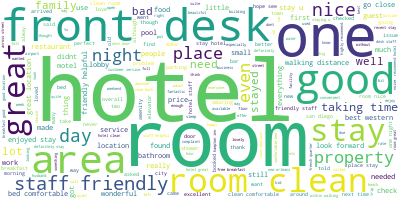

In [66]:
# Generate word cloud

# Join the different processed reviews together.
long_string = ','.join(list(data['clean_review'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [73]:
%%time

vectorizer = TfidfVectorizer(max_df=0.7, max_features=50, min_df=0.1, ngram_range=(1,1)).fit(X)

data_vectorized = vectorizer.transform(X)

lda_model = LDA().fit(data_vectorized)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 28 s


In [75]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('bed', 684.7991735184454), ('comfortable', 547.6402728293364), ('room', 443.30734636401365), ('clean', 296.98959810560297), ('nice', 210.09040846677976), ('hotel', 208.8400566662508), ('breakfast', 190.80602503654495), ('good', 169.08645700742963), ('stay', 140.45356115635454), ('great', 133.2264066678566)]
Topic 1:
[('desk', 731.1031954676747), ('front', 726.0299416983988), ('room', 321.4957361662295), ('hotel', 233.2583886804454), ('staff', 165.3476174517772), ('stay', 142.51241781780436), ('clean', 120.5614454217476), ('helpful', 118.12050030056292), ('would', 117.34577900232237), ('service', 114.69896173534156)]
Topic 2:
[('staff', 653.5571807686033), ('friendly', 626.8678530583207), ('helpful', 520.129992798126), ('hotel', 387.08051072285343), ('clean', 383.17991143132383), ('room', 348.5983920928628), ('stay', 270.8396483006236), ('great', 266.1067890314636), ('breakfast', 227.21704901636204), ('nice', 181.85112001558184)]
Topic 3:
[('good', 862.1059608875519), ('locat

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Visualize LDA output topics
num_topics = 10
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\users\njeri\.venvs\smart_stay\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'corpus' is not defined

## Deep Learning Modeling & Evaluating
- complete sentiment analysis (with visualization) using Word2Vec
- model with RNN (with embedding layer, using only words that occur more than 30 times)
- model with CNN (1D)

## Data Engineering
- create package (init, setup, reqs, etc)
- check formatting with Black
- use MLflow to track performance of model iterations
- train on GCP
- build API with FastAPI and Uvicorn
- build Docker image & deploy to Cloud Run (may also consider Heroku)
- build UI; initial ideas:
    - "where do you want to go?" User input of location
    - Or could be "what do you want to do?" User input of activities with location then suggested
    - Locations show map of hotel locations (using lat/lon to locate, Taxi Fare interface as a starting point)
    - Location page shows average rating and number of ratings and some blurbs of what has been said
- consider flask or streamlit for app (dependent on which works better with Cloud Run)

## Kitt References
- Machine Learning:
    - Natural Language Processing
    - Performance Metrics
- Deep Learning:
    - Natural Langauge Processing
- Data Engineering:
    - Code as a Product
    - Machine Learning Iteration
    - Train at Scale
    - Predict in Production
    - User Interface